In [38]:
!pip install torch 
!pip install torchvision 
!pip install requests 

In [0]:
import torch
import torchvision.transforms as transforms 
import torchvision.models as models 
import requests 
from matplotlib import pyplot as plt 
import cv2

In [40]:
!wget https://www.codeproject.com/KB/GDI-plus/ImageProcessing2/img.jpg

--2018-07-29 16:47:45--  https://www.codeproject.com/KB/GDI-plus/ImageProcessing2/img.jpg
Resolving www.codeproject.com (www.codeproject.com)... 76.74.234.210
Connecting to www.codeproject.com (www.codeproject.com)|76.74.234.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18129 (18K) [image/jpeg]
Saving to: ‘img.jpg.26’

img.jpg.26          100%[===================>]  17.70K  --.-KB/s    in 0s      

2018-07-29 16:47:45 (122 MB/s) - ‘img.jpg.26’ saved [18129/18129]



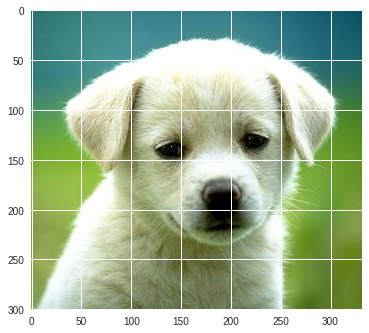

In [41]:
im = cv2.imread('img.jpg', 1)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)

plt.show()

In [0]:
model = models.resnet18(pretrained=True).eval()

In [0]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

preprocess = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize((224, 224)),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [0]:
t = torch.tensor(im)

t = t.type(torch.FloatTensor)/255

t = t.permute(2, 0, 1)

t = preprocess(t)

t = t.unsqueeze(0)

t = t.type(torch.FloatTensor)

In [45]:
results = torch.nn.Softmax()(model(t))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [0]:
index = torch.argmax(results).item()

In [0]:
labels = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json').json()

In [48]:
labels[str(index)]

[u'n02104029', u'kuvasz']